In [ ]:
# default_exp solvers

# solvers
> algorithms to solve the MAP problems

In [ ]:
#export
from thompson_sampling.abstractions import AbstractSolver, AbstractContextualSolver
import numpy as np
import scipy.stats as stats
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2



## categorical

### non-contextual

#### AB test

In [ ]:
#export
class AB(AbstractSolver):
  def __init__(self, n_experiments=1000, num_options=2):
    self.trials = np.zeros(shape=(num_options,))
    self.successes = np.zeros(shape=(num_options,))
    self.experiments_done = 0
    self.n_experiments = n_experiments



  def choose_arm(self):
    """we choose to either randomly sample an arm 
    or play the previously determined best choice"""

    # if we need more experimentation, we explore
    if self.experiments_done < self.n_experiments:
      arm = self.explore()
    # otherwise, we exploit
    else:
      arm = self.exploit()
    return arm


  def update(self, arm, reward):
    """Updates the arms about being played and about receiving a reward"""

    # simply count the number of trials and successes for each arm
    self.trials[arm] += 1
    if reward:
      self.successes[arm] += 1
    self.experiments_done += 1


  def explore(self):
    """returns arm 0 or arm 1 depending on a draw from interval [0,1]
    NOTE: this isn't necessarilyhow you'd do it in real life, 
    please consult the sources for that case"""

    # literally choose by random which arm to return
    if np.random.random() <.5:
        return 0
    else:
        return 1

  def exploit(self):
    """returns arm with highest expected payoff
    Always the same arm after exploration phase"""

    # return the arm with the highest success rate
    return np.argmax(self.successes/self.trials)
  


In [ ]:
#export
class BetaBandit(AbstractSolver):

    def __init__(self, num_options = 2, prior = None):
        """initialize BetaBandit"""
        self.num_options = num_options

        #setting the prior, either uninformative or user generated
        if prior == None:
            self.prior = np.ones(shape=(num_options,2))
        else:
            assert prior.shape == (num_options,2), f"the prior seems to have wrong dimensionality, please conform to (num_options, 2){(num_options,2)}"
            self.prior = prior

        self.trials = np.zeros(shape=(num_options,))
        self.successes = np.zeros(shape=(num_options,))


    def choose_arm(self):
        """draw from arms.
        arm with the highest expected outcome wins. 
        expected outcome is determined stochastically, so even an arm with bad 
        outcome until now will have a chance of being drawn"""

        sampled_theta=[]
        for i in range(self.num_options):

            dist = stats.beta(self.prior[i,0]+self.successes[i], 
                              self.prior[i,1]+self.trials[i] - self.successes[i])
                
            sampled_theta += [dist.rvs()]
      
        return(sampled_theta.index(max(sampled_theta)))    
        
    def update(self,arm,success):
        """update beta-parameters of specific arm"""
        #count times arm has been drawn"""
        self.trials[arm] = self.trials[arm] +1
        #count number of successes on that arm"""

        # for decay factors: self.successes = self.successes *.99
        if success:
            self.successes[arm] = self.successes[arm]+ 1
            





# helpers

    def choose_arm_and_plot(self):


        sampled_theta = []
        dist_heights = []

      
        for i in range(self.num_options):

            dist = stats.beta(self.prior[i,0]+self.successes[i], 
                              self.prior[i,1]+self.trials[i] - self.successes[i])
            sample = dist.rvs()
            sampled_theta += [sample]
            dist_heights += [dist.pdf(sample)]

            
        w = 10
        z = 5
        colors = iter(cm.rainbow(np.linspace(0, 1, self.num_options)))
            
        for k,i in enumerate(range(self.num_options)):
                color = next(colors)

                dist = stats.beta(self.prior[i,0] + self.successes[i],
                            self.prior[i,1] + self.trials[i] - self.successes[i])
                x = np.linspace(0,1,100)
                y = dist.pdf(x)
                plt.plot(x,y,color=color,label="arm #%i"%(i+1),alpha=0.8)

                plt.scatter(sampled_theta[i],dist_heights[i], s = 200,label=f'sample drawn from arm {i}')

                plt.fill_between(x,0,y,alpha=1/(self.num_options+1),color=color)
                leg = plt.legend()
                plt.tight_layout    
      
        return(sampled_theta.index(max(sampled_theta)))  


    def plot_params(self):
        """plot the distributions that underly the arms"""
        
        w = 10
        z = 5
        colors = iter(cm.rainbow(np.linspace(0, 1, self.num_options)))
            
        for k,i in enumerate(range(self.num_options)):
                color = next(colors)

                dist = stats.beta(self.prior[i,0] + self.successes[i],
                            self.prior[i,1] + self.trials[i] - self.successes[i])
                x = np.linspace(0,1,100)
                y = dist.pdf(x)
                plt.plot(x,y,color=color,label="arm #%i"%(i+1))
                plt.fill_between(x,0,y,alpha=1/self.num_options,color=color)
                leg = plt.legend()
                plt.tight_layout


In [ ]:
bb = BetaBandit()
np.mean([bb.choose_arm() for x in range(100)])

0.49

0

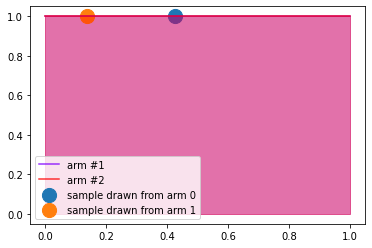

In [ ]:
bb.choose_arm_and_plot() #uniform binomials, no observations yet

0

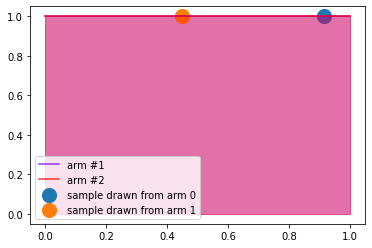

In [ ]:
bb.choose_arm_and_plot() #uniform binomials, no observations yet

In [ ]:
bb.update(0,0)
bb.update(0,1)
bb.update(0,1)

In [ ]:
np.mean([bb.choose_arm() for x in range(100)])

0.42

0

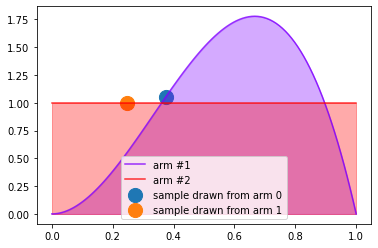

In [ ]:
bb.choose_arm_and_plot()

In [ ]:
bb.update(1,0)
bb.update(1,0)
bb.update(1,0)

0

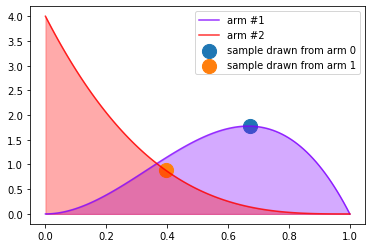

In [ ]:
bb.choose_arm_and_plot()

# Numerical

## noncontextual

# Combinations

## noncontextual

### AX sample scheme 
normal distribution over outcomes, sample from winning arm a few times, p of winning is how often arm1 won over arm2





In [ ]:
test = [1,0,1,1,1,1,1,0,0,0,0]

np.mean(test), np.std(test)


(0.5454545454545454, 0.49792959773196915)

In [ ]:
sum_x = 0
sum_x2 = 0

for n,sample in enumerate(test):
    sum_x += sample
    sum_x2 += sample*sample
    


In [ ]:
mean = sum_x / (n+1)
stdev = np.sqrt((sum_x2 / (n+1)) - (mean * mean)) 


In [ ]:
mean, stdev

(0.5454545454545454, 0.4979295977319692)

In [ ]:
sample

0

In [ ]:
stats.norm()

In [ ]:
#export
class GaussianBandit(AbstractSolver):

    def __init__(self, num_options = 2, mean_prior = 0, std_prior = 1):
        """initialize BetaBandit"""
        self.num_options = num_options

        #setting the prior, either uninformative or user generated
#         if prior == None:
#             self.prior = np.ones(shape=(num_options,2))
#         else:
#             assert prior.shape == (num_options,2), f"the prior seems to have wrong dimensionality, please conform to (num_options, 2){(num_options,2)}"
#             self.prior = prior

        self.trials = np.zeros(shape=(num_options,))
        self.sum_x = np.zeros(shape=(num_options,))
        self.sum_x2 = np.zeros(shape=(num_options,))

        self.mean_prior = mean_prior
        self.std_prior = std_prior

    def choose_arm(self):
        """draw from arms.
        arm with the highest expected outcome wins. 
        expected outcome is determined stochastically, so even an arm with bad 
        outcome until now will have a chance of being drawn"""

        sampled_outcomes = []
        for i in range(self.num_options):
            
            if self.trials[i] > 1:
                mean = self.compute_online_mean(i)
                stdev = self.compute_online_std(i, mean)
            else:
                mean = 0
                stdev = 1
            

            dist = stats.norm(mean,stdev)
            
            sampled_outcome = dist.rvs()
            #print(sampled_outcome)
            
            sampled_outcomes += [sampled_outcome]
      
        return(sampled_outcomes.index(max(sampled_outcomes)))    
        
    def update(self, arm, outcome):
        """update parameters of specific arm"""
        #count times arm has been drawn"""
        self.trials[arm] = self.trials[arm] +1
        #count number of successes on that arm"""

        # for decay factors: self.successes = self.successes *.99
        
        self.sum_x[arm] += outcome
        self.sum_x2[arm] += outcome*outcome
        
        
    def compute_online_mean(self, arm):
        return self.sum_x[arm] / (self.trials[arm])
    
    def compute_online_std(self, arm, mean = None):
        mean = mean or self.compute_online_mean(arm)
        return np.sqrt((self.sum_x2[arm] / (self.trials[arm])) - (mean * mean)) 
        
        
        

            

In [ ]:
gb = GaussianBandit(2)

In [ ]:
np.mean([gb.choose_arm() for x in range(100)])

0.53

In [ ]:
gb.update(0, 1)
gb.update(0, 1)
gb.update(1, 0)
gb.update(1, 0)

In [ ]:
np.mean([gb.choose_arm() for x in range(100)])

0.0

In [ ]:
gb.trials

array([2., 2.])

In [ ]:
gb.compute_online_mean(0), gb.compute_online_mean(1)

(1.0, 0.0)

In [ ]:
gb.compute_online_std(0), gb.compute_online_std(1)

(0.0, 0.0)

In [ ]:
gb.update(1, 1)
gb.update(0, 1)
gb.update(0, 0)
gb.update(1, 0)

In [ ]:
np.mean([gb.choose_arm() for x in range(100)])

0.24

In [ ]:
gb.compute_online_mean(0), gb.compute_online_mean(1)

(0.75, 0.25)

In [ ]:
gb.compute_online_std(0), gb.compute_online_std(1)

(0.4330127018922193, 0.4330127018922193)

In [ ]:
#export
class GaussianCategoricalBandit(GaussianBandit):


    def choose_arm(self):
        """draw from arms.
        arm with the highest expected outcome wins. 
        expected outcome is determined stochastically, so even an arm with bad 
        outcome until now will have a chance of being drawn"""

        sampled_outcomes = []
        arm_samples = np.zeros(shape=(self.num_options,100))
        for arm in range(self.num_options):
            
            for i in range(100):
            
                if self.trials[arm] > 1:
                    mean = self.compute_online_mean(arm)
                    stdev = self.compute_online_std(arm, mean)
                else:
                    mean = 0
                    stdev = 1


                dist = stats.norm(mean,stdev)

                arm_samples[arm,i] = dist.rvs()
                #print(sampled_outcome)
        #print(arm_samples)
        winning_ratio = np.argmax(arm_samples,0)
        #print(winning_ratio.shape)
        #print(winning_ratio)

        #winning_ratio = np.argmax()
        winning_arm = np.bincount(winning_ratio).argmax()
        #print(winning_arm)
        #sampled_outcome = np.mean()
        #sampled_outcomes += [sampled_outcome]
        #print(np.bincount(winning_ratio)/100)
      
        #return(sampled_outcomes.index(max(sampled_outcomes)))  
        
        # ToDo sample from ratio of winning arms, i.e. nb.bincount(winning_ratio).mean()
        return winning_arm
        

        
    def plot_params(self):
        """plot the distributions that underly the arms"""
        
        w = 10
        z = 5
        colors = iter(cm.rainbow(np.linspace(0, 1, self.num_options)))
            
        for k,i in enumerate(range(self.num_options)):
                color = next(colors)
                
                
            
            
                if self.trials[i] > 1:
                    mean = self.compute_online_mean(i)
                    stdev = self.compute_online_std(i, mean)
                else:
                    mean = 0
                    stdev = 1


                dist = stats.norm(mean,stdev)

                x = np.linspace(-6,6,100)
                y = dist.pdf(x)
                plt.plot(x,y,color=color,label="arm #%i"%(i+1))
                plt.fill_between(x,0,y,alpha=1/self.num_options,color=color)
                leg = plt.legend()
                plt.tight_layout

            

In [ ]:
gcb = GaussianCategoricalBandit(2)

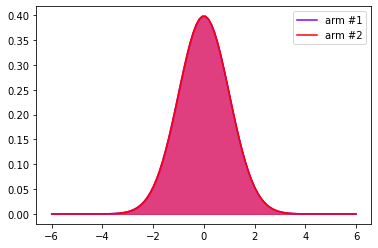

In [ ]:
gcb.plot_params()

In [ ]:
gcb.choose_arm()

1

In [ ]:
[i for i in range(gcb.num_options)]

[0, 1]

In [ ]:
gb = GaussianBandit(2)
bb = BetaBandit(2)
gcb = GaussianCategoricalBandit(2)

In [ ]:
np.mean([gcb.choose_arm() for x in range(100)])

0.4

In [ ]:
for i in range(100):
    
    arm1_update = np.random.choice([0,1],p=[0.8,0.2])
    arm2_update = np.random.choice([0,1],p=[0.9,0.1])
    bb.update(0,arm1_update)
    bb.update(1, arm2_update)
    
    gcb.update(0,arm1_update)
    gcb.update(1, arm2_update)

In [ ]:
np.mean([gcb.choose_arm() for x in range(100)]), np.mean([bb.choose_arm() for x in range(100)])

(0.21, 0.16)

In [ ]:
gcb.compute_online_mean(0), gcb.compute_online_mean(1)

(0.0425, 0.0275)

In [ ]:
gcb.compute_online_std(0), gcb.compute_online_std(1)

(0.20172691937369192, 0.1635351644142629)

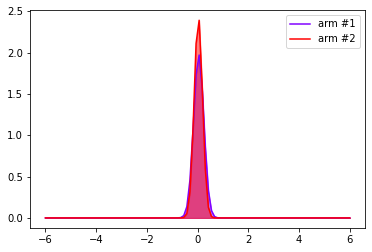

In [ ]:
gcb.plot_params()

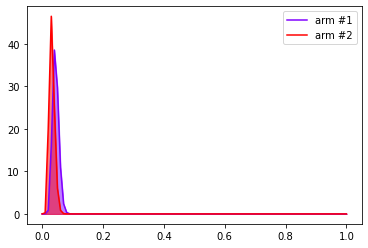

In [ ]:
bb.plot_params()

## Contextual

In [ ]:
#export
class LogisticThompsonSampler(AbstractContextualSolver):

    
    def update(self,arm,context,reward):
        
        model = self.model_list[arm]
        #X =  np.atleast_1d(np.append(arm, context))
        X = np.atleast_2d(context)
        # print(f'X {X}')
    
        reward = np.atleast_1d(reward)
        #model.observe(X.reshape(1,-1), reward.reshape(1,-1))
        model.observe(X, reward)
        
    def choose_arm(self,context):
        reward_list = []

        for arm in range(self.num_arms):
            model = self.model_list[arm]
            X = np.atleast_2d(context)
            
            probas = model.predict_proba(X)

            reward_sample = probas[0][1]
            
            # print(reward_sample)
        
            reward_list += [reward_sample]

            
      
        return np.argmax(reward_list)     
    
    
    
    
    
    
    
# helpers

    def plot_params(self):
        colors = iter(cm.rainbow(np.linspace(0, 1, self.num_arms)))

        for arm in range(len(self.model_list)):
            color = next(colors)

            model = self.model_list[arm]
            X_pdf = np.linspace(-2, 2, 1000)
            pdf = stats.norm(loc=model.m, scale=model.q**(-1.0)).pdf(X_pdf)


            # plotting distriution of weights
            plt.plot(X_pdf, pdf, color=color, linewidth=2, alpha=0.5, label=f'estimated parameter arm {arm}')
            plt.fill_between(X_pdf, pdf, 0, color=color, alpha=0.2)
            plt.legend()

        
        
    def choose_arm_and_plot(self,context):
        colors = iter(cm.rainbow(np.linspace(0, 1, self.num_arms)))
        reward_list = []

        
        for arm in range(self.num_arms):
            model = self.model_list[arm]
            X = np.atleast_1d(context)


            reward_sample = model.predict_proba(X)[0]
            reward_list += [reward_sample]
            
            # plot
            color = next(colors)

            model = self.model_list[arm]
            X_pdf = np.linspace(-2, 2, 1000)
            dist = stats.norm(loc=model.m, scale=model.alpha**(-1.0))
            pdf = dist.pdf(X_pdf)
            
            height = dist.pdf(reward_sample)


            # plotting distriution of weights
            plt.plot(X_pdf, pdf, color=color, linewidth=2, alpha=0.5, label=f'estimated parameter arm {arm}')
            plt.fill_between(X_pdf, pdf, 0, color=color, alpha=0.2)

            
            plt.scatter(reward_sample, height, s = 200,label=f'sample drawn from arm {arm}')

            plt.legend()
        return np.argmax(reward_list)     


In [ ]:
from thompson_sampling.models import OnlineLogisticRegression
from thompson_sampling.multi_armed_bandits import contextual_categorical_bandit

In [ ]:
lts = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 1)

1

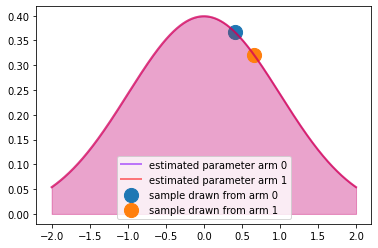

In [ ]:
lts.choose_arm_and_plot(0.9)

In [ ]:
arm0 = 0
arm1 = 1
theta = [0.1, 1.9]
noise = 0.0


lts.update(arm1, .1, contextual_categorical_bandit(context = np.array(0.1),choice = arm1, theta = theta, noise = noise)[0])
lts.update(arm1, .1, contextual_categorical_bandit(context = np.array(.1),choice = arm1, theta = theta, noise = noise)[0])
lts.update(arm1, .5, contextual_categorical_bandit(context = np.array(0.5),choice = arm1, theta = theta, noise = noise)[0])
lts.update(arm1, .5, contextual_categorical_bandit(context = np.array(.5),choice = arm1, theta = theta, noise = noise)[0])
lts.update(arm1, .9, contextual_categorical_bandit(context = np.array(0.9),choice = arm1, theta = theta, noise = noise)[0])
lts.update(arm1, .9, contextual_categorical_bandit(context = np.array(.9),choice = arm1, theta = theta, noise = noise)[0])


1

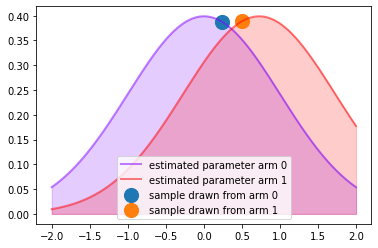

In [ ]:
lts.choose_arm_and_plot(0.9)

In [ ]:
lts.choose_arm(0.9)

0

In [ ]:
lts2 = LogisticThompsonSampler(OnlineLogisticRegression, num_arms=2, num_context = 2)

In [ ]:
context = np.atleast_1d(np.array([1,1]))#.T#.reshape(1,-1)#.T

lts2.choose_arm(context)

0

In [ ]:
context.shape

(2,)

In [ ]:
lts2.update(0,context,np.atleast_1d(1))

In [ ]:
from nbdev.export import *
notebook2script()

Converted 00_abstractions.ipynb.
Converted 01_multi_armed_bandits.ipynb.
Converted 02_models.ipynb.
Converted 03_ensembles.ipynb.
Converted 04_solvers.ipynb.
Converted 10_adversarial_thompson_sampler.ipynb.
Converted 99_helpers.ipynb.
Converted contextual_bandits.ipynb.
Converted index.ipynb.
Converted noncontextual_bandits.ipynb.
